# Train model

In [258]:
import pandas as pd
import numpy as np

# Import train_data
train_data = pd.read_csv(r'D:\NEU\Năm 3\ML\Data\ds1_train.csv')
X_train = train_data[['x_1','x_2']].values
y_train = train_data['y'].values.reshape((-1, 1))


class LogisticRegression:
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _transform(self, X):
        ones = X.shape[0]
        self._X = np.c_[np.ones((ones,1)), X]
        return

    def fit(self,X,y,learning_rate=0.01,num_iterations=5000):
        self._transform(X)
        self._weight = np.zeros((self._X.shape[1],1))

        for _ in range(num_iterations):
            z = self._X @ self._weight
            y_pred = self._sigmoid(z)
            gradient = (self._X.T @ (y_pred - y))
            self._weight -= learning_rate * gradient

    def predict_prob(self, X):
        self._transform(X)

        prob_estimated = self._sigmoid(self._X @ self._weight)
        return prob_estimated

    
    def predict(self, X, threshold=0.5):
        prob_estimated = self.predict_prob(X)

        classification_predicted = np.zeros(X.shape[0])  
        classification_predicted[np.where(prob_estimated > threshold)[0]] = 1

        return classification_predicted

    
    def accuracy(self, X, y):
        y_predict = self.predict(X, threshold=0.5)
        num_matches = (y_predict == y.squeeze()).sum()  
        total_obs = y.shape[0]
        return num_matches / total_obs
    
    def plot_data(self,X):
        group = self.predict(X,threshold=0.5)
        class_0 = group[group==0]
        class_1 = group[group==1]
        
        plt.plot(class_0,'ro',label='0')
        plt.plot(class_1,'bo',label='1')
        plt.legend()
        plt.show()

In [259]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_2648\1983158992.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [260]:
model.accuracy(X_train,y_train)

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_2648\1983158992.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.8225

# Test model

In [261]:
test_data = pd.read_csv(r'D:\NEU\Năm 3\ML\Data\ds1_valid.csv')
test_data

,x_1,x_2,y
0,2.177396,78.630076,0.0
1,3.952131,123.541573,0.0
2,3.351176,47.752517,0.0
3,2.074934,26.997730,0.0
4,3.579775,226.703779,0.0
...,...,...,...
95,3.795618,11.708285,1.0
96,3.953480,7.320390,1.0
97,3.863524,26.396698,1.0
98,4.917294,102.078713,1.0


In [262]:
X_test = test_data[['x_1','x_2']].values
y_test = test_data['y'].values.reshape((-1, 1))

In [263]:
test_model = LogisticRegression()
test_model.fit(X_test,y_test)

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_2648\1983158992.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [267]:
test_model.accuracy(X_test,y_test)

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_2648\1983158992.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.82

Accuracy on test set by our model: 82.0000%


C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_2648\1983158992.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


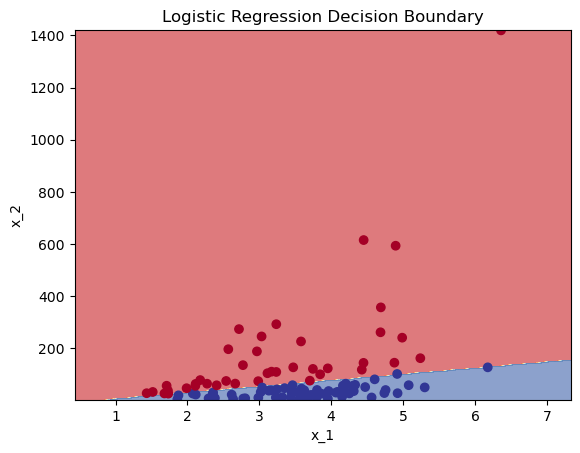

In [268]:
# Create a mesh grid to cover the feature space
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the trained model to make predictions on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary as a filled contour plot
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)

# Calculate accuracy using the accuracy_score method
accuracy = test_model.accuracy(X_test,y_test)
print("Accuracy on test set by our model: {:.4f}%".format(accuracy * 100))

# Visualize the decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_model.predict(X_test), cmap=plt.cm.RdYlBu, marker='o')
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("Logistic Regression Decision Boundary")
plt.show()
